## GEMS CDL Usage Example

### Set up an HTTP client using Python's request library
We use a Session object to store our API key and automatically include it in the header for each request. Note that we have a `api_key.py` file in the Exchange-Notebooks directory. The file contains only the below line.
```
api_key = 'SECRET'
```

In [1]:
import numpy as np
import pandas as pd
import sys
import rasterio
import yaml
import matplotlib.patches as mpatches

from base64 import b16encode
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from requests import Session
from mpl_toolkits.axes_grid1 import make_axes_locatable

sys.path.append('/home/riss/jathomps/projects/iaa_gems/gems_visualizations/')
import cm_xml_to_matplotlib as cm
# sys.path.append('..')
# from api_key import api_key

# s = Session()
# s.headers.update({'apikey': api_key})
# url = "https://exchange-1.gems.msi.umn.edu/landcover/v2"
# dataset = "predict-cdl"

In [2]:
keys = yaml.load(open('/home/riss/jathomps/api_keys.yaml'), Loader=yaml.FullLoader)
api_key = keys['gems']['apikey']

In [3]:
s = Session()
s.headers.update({'apikey': api_key})
url = "https://exchange-1.gems.msi.umn.edu/landcover/v2"
dataset = "predict-cdl"

### Metadata

In [4]:
classes = {1 : "Corn", 2 : "Cotton", 3 : "Rice", 4 : "Sorghum", 5 : "Soybeans", 6 : "Sunflower",
           10 : "Peanuts", 11 : "Tobacco", 12 : "Sweet Corn", 13 : "Pop or Orn Corn", 14 : "Mint", 21 : "Barley",
           22 : "Durum Wheat", 23 : "Spring Wheat", 24 : "Winter Wheat", 25 : "Other Small Grains", 
           26 : "Dbl Crop WinWht/Soybeans", 27 : "Rye", 28 : "Oats", 29 : "Millet", 30 : "Speltz",
           31 : "Canola", 32 : "Flaxseed", 33 : "Safflower", 34 : "Rape Seed", 35 : "Mustard",
           36 : "Alfalfa", 37 : "Other Hay-Non Alfalfa", 38 : "Camelina", 39 : "Buckwheat", 41 : "Sugarbeets",
           42 : "Dry Beans", 43 : "Potatoes", 44 : "Other Crops", 45 : "Sugarcane", 46 : "Sweet Potatoes",
           47 : "Misc Vegs & Fruits", 48 : "Watermelons", 49 : "Onions", 50 : "Cucumbers", 51 : "Chick Peas",
           52 : "Lentils", 53 : "Peas", 54 : "Tomatoes", 55 : "Caneberries", 56 : "Hops", 57 : "Herbs",
           58 : "Clover/Wildflowers", 59 : "Sod/Grass Seed", 60 : "Switchgrass", 61 : "Fallow-Idle Cropland",
           63 : "Forest", 64 : "Shrubland", 65 : "Barren", 66 : "Cherries", 67 : "Peaches", 68 : "Apples",
           69 : "Grapes", 70 : "Christmas Trees", 71 : "Other Tree Crops", 72 : "Citrus", 74 : "Pecans",
           75 : "Almonds", 76 : "Walnuts", 77 : "Pears", 81 : "Clouds-No Data", 82 : "Developed",
           83 : "Water", 87 : "Wetlands", 88 : "Nonag/Undefined", 92 : "Aquaculture", 111 : "Open Water",
           112 : "Perennial Ice/Snow", 121 : "Developed/Open Space", 122 : "Developed/Low Intensity",
           123 : "Developed/Med Intensity", 124 : "Developed/High Intensity", 131 : "Barren", 141 : "Deciduous Forest",
           142 : "Evergreen Forest", 143 : "Mixed Forest", 152 : "Shrubland", 176 : "Grassland/Pasture",
           190 : "Woody Wetlands", 195 : "Herbaceous Wetlands", 204 : "Pistachios", 205 : "Triticale",
           206 : "Carrots", 207 : "Asparagus", 208 : "Garlic", 209 : "Cantaloupes", 210 : "Prunes", 211 : "Olives",
           212 : "Oranges", 213 : "Honeydew Melons", 214 : "Broccoli", 215 : "Avocados", 216 : "Peppers",
           217 : "Pomegranates", 218 : "Nectarines", 219 : "Greens", 220 : "Plums", 221 : "Strawberries",
           222 : "Squash", 223 : "Apricots", 224 : "Vetch", 225 : "Dbl Crop WinWht/Corn", 226 : "Dbl Crop Oats/Corn",
           227 : "Lettuce", 228 : "Dbl Crop Triticale/Corn", 229 : "Pumpkins", 230 : "Dbl Crop Lettuce/Durum Wht",
           231 : "Dbl Crop Lettuce/Cantaloupe", 232 : "Dbl Crop Lettuce/Cotton", 233 : "Dbl Crop Lettuce/Barley",
           234 : "Dbl Crop Durum Wht/Sorghum", 235 : "Dbl Crop Barley/Sorghum", 236 : "Dbl Crop WinWht/Sorghum",
           237 : "Dbl Crop Barley/Corn", 238 : "Dbl Crop WinWht/Cotton", 239 : "Dbl Crop Soybeans/Cotton",
           240 : "Dbl Crop Soybeans/Oats", 241 : "Dbl Crop Corn/Soybeans", 242 : "Blueberries", 243 : "Cabbage",
           244 : "Cauliflower", 245 : "Celery", 246 : "Radishes", 247 : "Turnips", 248 : "Eggplants",
           249 : "Gourds", 250 : "Cranberries", 254: "Dbl Crop Barley/Soybeans", 0 : "NoData"}

In [5]:
palette = {0: (0, 0, 0), 1: (255, 212, 0), 2: (255, 38, 38), 3: (0, 168, 227), 4: (255, 158, 9), 5: (38, 112, 0), 6: (255, 255, 0), 
           7: (0, 0, 0), 8: (0, 0, 0), 9: (0, 0, 0), 10: (112, 166, 0), 11: (0, 176, 74), 12: (222, 166, 9), 13: (222, 166, 9), 
           14: (125, 212, 255), 15: (0, 0, 0), 16: (0, 0, 0), 17: (0, 0, 0), 18: (0, 0, 0), 19: (0, 0, 0), 20: (0, 0, 0), 21: (227, 0, 125), 
           22: (138, 97, 84), 23: (217, 181, 107), 24: (166, 112, 0), 25: (214, 158, 189), 26: (112, 112, 0), 27: (171, 0, 125), 28: (161, 89, 138),
           29: (112, 0, 74), 30: (214, 158, 189), 31: (209, 255, 0), 32: (125, 153, 255), 33: (214, 214, 0), 34: (209, 255, 0), 35: (0, 176, 74), 
           36: (255, 166, 227), 37: (166, 242, 140), 38: (0, 176, 74), 39: (214, 158, 189), 40: (0, 176, 74), 41: (168, 0, 227), 42: (166, 0, 0), 
           43: (112, 38, 0), 44: (0, 176, 74), 45: (176, 125, 255), 46: (112, 38, 0), 47: (255, 102, 102), 48: (255, 102, 102), 49: (255, 204, 102), 
           50: (255, 102, 102), 51: (0, 176, 74), 52: (0, 222, 176), 53: (84, 255, 0), 54: (242, 163, 120), 55: (255, 102, 102), 56: (0, 176, 74), 
           57: (125, 212, 255), 58: (232, 191, 255), 59: (176, 255, 222), 60: (0, 176, 74), 61: (191, 191, 120), 62: (0, 0, 0), 63: (148, 204, 148), 
           64: (199, 214, 158), 65: (204, 191, 163), 66: (255, 0, 255), 67: (255, 143, 171), 68: (186, 0, 79), 69: (112, 69, 138), 70: (0, 120, 120), 
           71: (176, 153, 112), 72: (255, 255, 125), 73: (0, 0, 0), 74: (181, 112, 92), 75: (0, 166, 130), 76: (232, 214, 176), 77: (176, 153, 112), 
           78: (0, 0, 0), 79: (0, 0, 0), 80: (0, 0, 0), 81: (242, 242, 242), 82: (153, 153, 153), 83: (74, 112, 163), 84: (0, 0, 0), 85: (0, 0, 0), 
           86: (0, 0, 0), 87: (125, 176, 176), 88: (232, 255, 191), 89: (0, 0, 0), 90: (0, 0, 0), 91: (0, 0, 0), 92: (0, 255, 255), 93: (0, 0, 0), 
           94: (0, 0, 0), 95: (0, 0, 0), 96: (0, 0, 0), 97: (0, 0, 0), 98: (0, 0, 0), 99: (0, 0, 0), 100: (0, 0, 0), 101: (0, 0, 0), 102: (0, 0, 0), 
           103: (0, 0, 0), 104: (0, 0, 0), 105: (0, 0, 0), 106: (0, 0, 0), 107: (0, 0, 0), 108: (0, 0, 0), 109: (0, 0, 0), 110: (0, 0, 0), 
           111: (74, 112, 163), 112: (212, 227, 250), 113: (0, 0, 0), 114: (0, 0, 0), 115: (0, 0, 0), 116: (0, 0, 0), 117: (0, 0, 0), 118: (0, 0, 0), 
           119: (0, 0, 0), 120: (0, 0, 0), 121: (153, 153, 153), 122: (153, 153, 153), 123: (153, 153, 153), 124: (153, 153, 153), 125: (0, 0, 0), 
           126: (0, 0, 0), 127: (0, 0, 0), 128: (0, 0, 0), 129: (0, 0, 0), 130: (0, 0, 0), 131: (204, 191, 163), 132: (0, 0, 0), 133: (0, 0, 0), 
           134: (0, 0, 0), 135: (0, 0, 0), 136: (0, 0, 0), 137: (0, 0, 0), 138: (0, 0, 0), 139: (0, 0, 0), 140: (0, 0, 0), 141: (148, 204, 148), 
           142: (148, 204, 148), 143: (148, 204, 148), 144: (0, 0, 0), 145: (0, 0, 0), 146: (0, 0, 0), 147: (0, 0, 0), 148: (0, 0, 0), 149: (0, 0, 0), 
           150: (0, 0, 0), 151: (0, 0, 0), 152: (199, 214, 158), 153: (0, 0, 0), 154: (0, 0, 0), 155: (0, 0, 0), 156: (0, 0, 0), 157: (0, 0, 0), 
           158: (0, 0, 0), 159: (0, 0, 0), 160: (0, 0, 0), 161: (0, 0, 0), 162: (0, 0, 0), 163: (0, 0, 0), 164: (0, 0, 0), 165: (0, 0, 0), 
           166: (0, 0, 0), 167: (0, 0, 0), 168: (0, 0, 0), 169: (0, 0, 0), 170: (0, 0, 0), 171: (0, 0, 0), 172: (0, 0, 0), 173: (0, 0, 0), 
           174: (0, 0, 0), 175: (0, 0, 0), 176: (232, 255, 191), 177: (0, 0, 0), 178: (0, 0, 0), 179: (0, 0, 0), 180: (0, 0, 0), 181: (0, 0, 0), 
           182: (0, 0, 0), 183: (0, 0, 0), 184: (0, 0, 0), 185: (0, 0, 0), 186: (0, 0, 0), 187: (0, 0, 0), 188: (0, 0, 0), 189: (0, 0, 0), 
           190: (125, 176, 176), 191: (0, 0, 0), 192: (0, 0, 0), 193: (0, 0, 0), 194: (0, 0, 0), 195: (125, 176, 176), 196: (0, 0, 0), 
           197: (0, 0, 0), 198: (0, 0, 0), 199: (0, 0, 0), 200: (0, 0, 0), 201: (0, 0, 0), 202: (0, 0, 0), 203: (0, 0, 0), 204: (0, 255, 140), 
           205: (214, 158, 189), 206: (255, 102, 102), 207: (255, 102, 102), 208: (255, 102, 102), 209: (255, 102, 102), 210: (255, 143, 171), 
           211: (51, 74, 51), 212: (227, 112, 38), 213: (255, 102, 102), 214: (255, 102, 102), 215: (102, 153, 77), 216: (255, 102, 102), 
           217: (176, 153, 112), 218: (255, 143, 171), 219: (255, 102, 102), 220: (255, 143, 171), 221: (255, 102, 102), 222: (255, 102, 102), 
           223: (255, 143, 171), 224: (0, 176, 74), 225: (255, 212, 0), 226: (255, 212, 0), 227: (255, 102, 102), 228: (255, 212, 0), 
           229: (255, 102, 102), 230: (138, 97, 84), 231: (255, 102, 102), 232: (255, 38, 38), 233: (227, 0, 125), 234: (255, 158, 9), 
           235: (255, 158, 9), 236: (166, 112, 0), 237: (255, 212, 0), 238: (166, 112, 0), 239: (38, 112, 0), 240: (38, 112, 0), 241: (255, 212, 0), 
           242: (0, 0, 153), 243: (255, 102, 102), 244: (255, 102, 102), 245: (255, 102, 102), 246: (255, 102, 102), 247: (255, 102, 102), 
           248: (255, 102, 102), 249: (255, 102, 102), 250: (255, 102, 102), 251: (0, 0, 0), 252: (0, 0, 0), 253: (0, 0, 0), 254: (38, 112, 0), 
           255: (0, 0, 0)}

### List available layers for `CDL` dataset

In [6]:
res = s.get(url + f"/{dataset}/layer")
layers = pd.json_normalize(res.json())
layers

,name,units,description,discrete,id
0,croptype-MN,unitless,Predicted croptype for USDA Cropland Data Laye...,True,313
1,ngram-MN,unitless,N-gram model matched when predicting croptype ...,True,314
2,probability-MN,unitless,Probability of predicted croptype for USDA Cro...,False,315


### List available objects within the area of interest

In [7]:
area_of_interest = "-95.40,44.30,-95.10,44.60"
params = {
    "bbox": area_of_interest
}

In [8]:
res = s.get(url + f"/{dataset}/object/search", params=params)
df = pd.json_normalize(res.json())
df.sort_values(by="id")

,id,grid_id,t_ranges,t_key,t_description,name,units,description,layer_id
0,187555,4,"[{'begin': '2023', 'end': '2024'}]",None,None,croptype-MN,unitless,Predicted croptype for USDA Cropland Data Laye...,313
1,187556,4,"[{'begin': '2023', 'end': '2024'}]",None,None,ngram-MN,unitless,N-gram model matched when predicting croptype ...,314
2,187557,4,"[{'begin': '2023', 'end': '2024'}]",None,None,probability-MN,unitless,Probability of predicted croptype for USDA Cro...,315


### Check spatial extent of the object

In [9]:
i = 187555

In [10]:
res = s.get(url + f"/{dataset}/object/{i}/envelope")
res.json()

{'type': 'Polygon',
 'coordinates': [[[-97.247925311, 43.35906784],
   [-97.247925311, 49.387092813],
   [-89.366182573, 49.387092813],
   [-89.366182573, 43.35906784],
   [-97.247925311, 43.35906784]]]}

### Sample point data

In [11]:
params = {
    "lat" : 45,
    "lon" : -95
}

In [12]:
# for i in range(187552):
for i in [187555]:
    res = s.get(url + f"/{dataset}/object/{i}")
    year = res.json()["t_ranges"][0]["begin"]
    res = s.get(url + f"/{dataset}/object/{i}/point", params=params)
    value = res.json()["value"]
    print (f"Value in {year} is {value} ({classes[value]})")

Value in 2023 is 1.0 (Corn)


### Get and visualize raster data

In [13]:
area_of_interest = "-95.40,44.30,-95.10,44.60"
params = {
    "bbox": area_of_interest
}

In [14]:
d = {}
unique = []
for i in [187555, 187557]:
# for i in [187552]:
    res = s.get(url + f"/{dataset}/object/{i}/raster", params=params)
    raster = res.content
    with rasterio.MemoryFile(raster) as memfile:
        with memfile.open() as dst:
            print (dst.profile)
            data = dst.read(1)
            if i == 187555:
                unique.extend(list(np.unique(data)))
                rgb = np.array([list(map(palette.__getitem__, row)) for row in data])
                d[i] = rgb
            else:
                d[i] = data

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 290, 'height': 275, 'count': 1, 'crs': CRS.from_epsg(6933), 'transform': Affine(100.08950233495489, 0.0, -9204831.171736462,
       0.0, -100.0895023349549, 5143699.614495667), 'blockysize': 28, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': nan, 'width': 290, 'height': 275, 'count': 1, 'crs': CRS.from_epsg(6933), 'transform': Affine(100.08950233495489, 0.0, -9204831.171736462,
       0.0, -100.0895023349549, 5143699.614495667), 'blockysize': 3, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


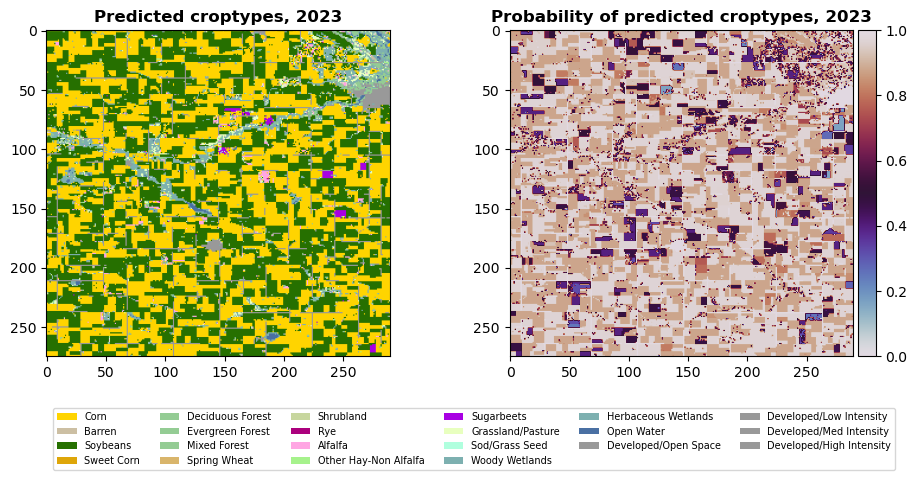

In [15]:
cmap='twilight'
# display arrays 
# fig, axs = plt.subplots(2,1, figsize=(4, 11), tight_layout=True)
fig, axs = plt.subplots(1,2, figsize=(11, 4), tight_layout=True)
plot0 = axs[0].imshow(d[187555])
axs[0].set_title("Predicted croptypes, 2023", weight="bold")
plot1 = axs[1].imshow(d[187557], cmap=cmap)
axs[1].set_title("Probability of predicted croptypes, 2023", weight="bold")

# colorbar for predictions
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0., vmax=1.))
cbar = fig.colorbar(mappable, cax=cax, orientation="vertical")
cbar.ax.tick_params(labelsize=10)

# format and add a legend
labels = [classes[l] for l in list(set(unique))]
clrs = [(b'#' + b16encode(bytes(palette[l]))).decode() for l in list(set(unique))]
c = [ mpatches.Patch(facecolor=clrs[i]) for i in range(len(labels))]
fig.legend(c, labels, ncol=6, loc='outside lower left', bbox_to_anchor=(0.13, -0.2),  fontsize=7)
# plt.tight_layout

### Get pixel counts by land cover type

In [16]:
area_of_interest = "-95.40,44.30,-95.10,44.60"
params = {
    "bbox": area_of_interest
}
i = 187555

In [17]:
res = s.get(url + f"/{dataset}/object/{i}/valuecount", params=params)
df = pd.json_normalize(res.json())
df["class"] = df.apply(lambda x : classes[x.value], axis=1)
df.sort_values(by="count", ascending=False)

,value,count,class
0,1.0,34422,Corn
1,5.0,33968,Soybeans
21,195.0,3791,Herbaceous Wetlands
10,121.0,2288,Developed/Open Space
15,141.0,1230,Deciduous Forest
19,176.0,1042,Grassland/Pasture
5,36.0,742,Alfalfa
11,122.0,723,Developed/Low Intensity
12,123.0,383,Developed/Med Intensity
7,41.0,313,Sugarbeets
